# Network motifs
In this notebook, we will be exploring how to work with network motifs. You will first need the following two modules. Networx is one of the main network science libraries for python. It has many functions built in for network analysis https://networkx.org/. We will also need the packages below. You may already have them installed, if so, you can skip the first cell, and just load them in the second cell.

In [5]:
import sys
!{sys.executable} -m pip install tabulate
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install random

You should consider upgrading via the 'C:\Users\StegehuisC\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\StegehuisC\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\StegehuisC\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\StegehuisC\Anaconda3\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random
You should consider upgrading via the 'C:\Users\StegehuisC\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [16]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import random as rd
from tabulate import tabulate

We will investigate motifs in the network of network science collaborations, so first let's load the data that you are interested in. Here, I included two sources of data: one of the european road network, and one collaboration network of network scientist. Choose whichever you like, and comment the other one out. 

In [30]:
G = nx.read_adjlist("netsci_data.tar")     #read adjacency list into a graph object
G = nx.read_adjlist("euroroad.tar")     #read adjacency list into a graph object
print(nx.info(G))

Graph with 1174 nodes and 1417 edges


## Exercise 1 
Count the number of triangles in the data sets

In [31]:
triad_count = sum(nx.triangles(G).values()) / 3 #In networkx, every triangle is counted 3 times, due to reordering of the vertices
print(triad_count, " triangles")

32.0  triangles


Now let's say that we take an Erdos Renyi model as a null model to test for whether a statistically significant number of triangles is present. First figure out what the correct values of $n$ and $p$ are to compare the ER-model with your data set.

In [32]:
n =               # fill in the correct value of n
p =       # fill in the correct value of p
print('p = ', p, ' n = ', n)

0.002056191938334557


With these values for $n$ and $p$, we can generate let's say 100 ER models that should serve as null models for the data sets, and count triangles in those null models. 

In [33]:
test_triad_counts = []  # vector with triangle counts in the ER model
for i in range(100):
    G_test = nx.erdos_renyi_graph(n,p)
    test_triad_counts.append(sum(nx.triangles(G_test).values()) / 3)

Now plot a histogram of the generated triangle counts from the ER model together with the triangle count in the network data

In [34]:
def plot_triads(countvec,datacount):    #This function plots a histogram of countvec, with a horizontal line at datacount
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(countvec, alpha = 0.65)
    plt.style.use("bmh")

    ax.set_yticks([])
    ax.grid(False)
    ax.tick_params(left = False, bottom = False)
    for ax, spine in ax.spines.items():
        spine.set_visible(False)
    plt.xlabel("triangle counts",size = 17)
    plt.ylabel("frequency",size = 17)
    plt.axvline(datacount, color = 'k', linestyle='dashed', linewidth=2)

    # Show plot
    plt.show()

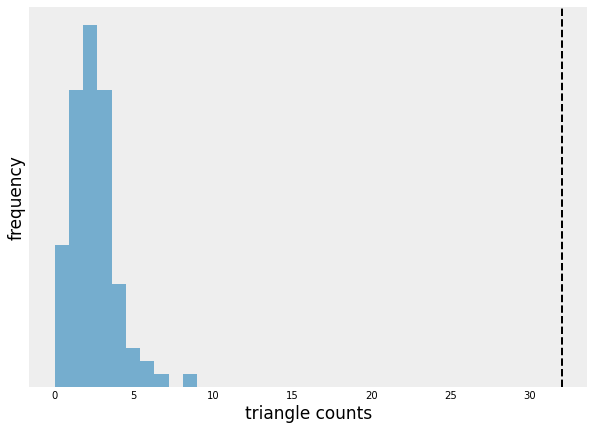

In [35]:
plot_triads(test_triad_counts,triad_count)

Now compute the Z-score of the triangle counts:

In [36]:
def Zscore(countvec,datacount):       #compute the Z score of datacount, when the null model produces as samples countvec
    meancount = np.average(countvec)
    std_count = np.std(countvec)     # standard deviation of triangle counts in null model
    return (datacount-meancount)/std_count

In [37]:
print('Zscore is ',Zscore(test_triad_counts,triad_count))

Zscore is  18.839131055235615


### Configuration model
Now let's try the same thing in the configuration model. The input for the configuration model is a degree sequence, and it creates a random graph on those degrees. So first generate the correct input for the configuration model to be able to compare it to the data, and then compare triangle counts. 

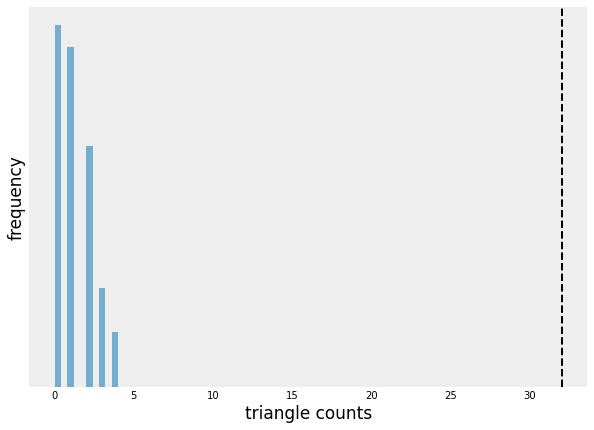

Zscore is  26.876202924205195


In [38]:
degree_sequence = # Pick the correct degree sequence

test_triad_config = []
for i in range(100):
    G_config = nx.configuration_model(degree_sequence)
    G_config= nx.Graph(G_config)
    test_triad_config.append(sum(nx.triangles(G_config).values()) / 3)
plot_triads(test_triad_config,triad_count)
print('Zscore is ',Zscore(test_triad_config,triad_count))

### Geometric random graph 
Now let's try yet another null model, the geometric random graph. Here, the input parameters are the radius $r$ and the number of vertices $n$. This model assumes that all $n$ vertices are uniformly placed in a $[0,1]^2$ box, and that every vertex connects with vertices within radius $r$. First, find the values of $r$ and $n$ for which you would be able to compare them to your data set, and then compare triangle counts.

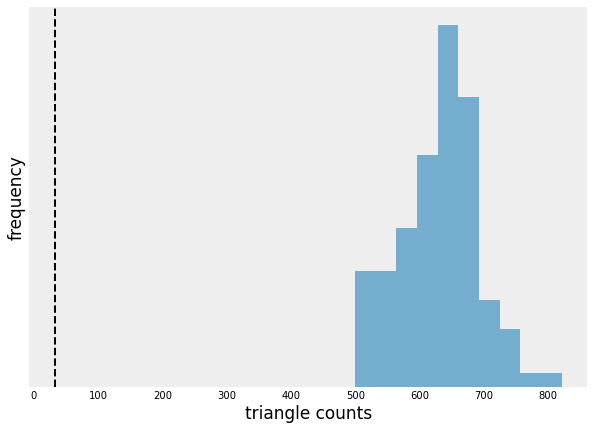

Zscore is  -9.694145145524121


In [39]:
radius =   # compute the radius which you think makes the Geometrc random graph a good null model

G_geom = nx.random_geometric_graph(n, radius)

test_triad_geom = []
for i in range(100):
    G_geom = nx.random_geometric_graph(n, radius)
    test_triad_geom.append(sum(nx.triangles(G_geom).values()) / 3)
plot_triads(test_triad_geom,triad_count)
print('Zscore is ', Zscore(test_triad_geom,triad_count))

## Questions
What are the differences between the different null models?

Are triangles always significant according to the Z-score?

Are there differences when selecting different data sets?

What is a good null model for these data?

# Part 2
##  Other motifs
We now investigate some other motif types. For simplicity, we will stick with cliques. First, lets generate a list of all cliques in the network, and a function that then counts all cliques of size $k$.

In [21]:
clique_list = nx.enumerate_all_cliques(G)   

In [22]:
def cliquenumber(cliques,k):                #A function that takes a list with all cliques in the graph, and then reports the number of k-cliques
    k_clique_num = 0
    for i in cliques:
        if len(i)==k:
            k_clique_num += 1
    return k_clique_num

Pick a value of $k$ that you are interested in (probably very large cliques do not appear so often, so you may want to choose it not so much bigger than 3). Then perform the clique count in the data.

In [23]:
k = 4
clique_count_G = cliquenumber(clique_list,k)
print(clique_count_G)

7159


You can now try the different null models for larger clique sizes and compare. The code now has the ER graph as a null mode, but you can try the other two null models as well:

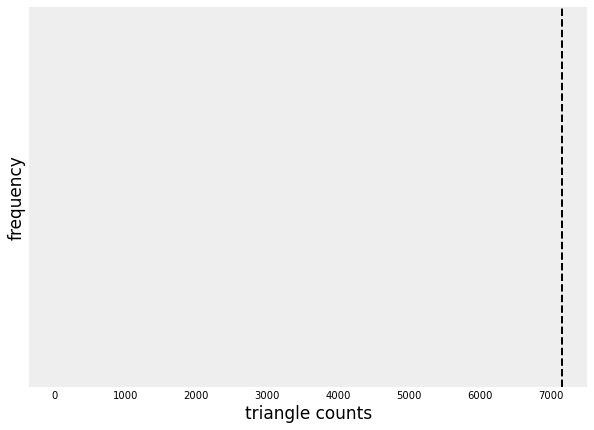

In [24]:
test_kclique_counts = []
for i in range(100):
    G_test = nx.erdos_renyi_graph(n,p)
    G_test_cliques = nx.enumerate_all_cliques(G_test) 
    test_kclique_counts.append(cliquenumber(G_test_cliques,k))
plot_triads(test_kclique_counts,clique_count_G)

### Questions
Do other $k$-cliques appear significantly often compared to the null models?

# Part 3
## Sampling
Sometimes it is not possible to count the exact number of subgraphs in a large networks due to large computation times. One of the solutions to this problem is to use sampling instead. Many methods to sample subgraphs exist, but here we focus on the simplest one of them, creating a subsample of the network where every node is included with probability $p$. Then, it computes subgraphs (in this case cliques) in the reduced graph. Figure out how to obtain an estimate for the number of cliques in the larger graph from this sampled clique count. 

In [290]:
def sampled_cliques(Graph,p,size): # This function takes in a graph Graph, and returns an estimated clique count for cliques of size 'size'
    nsampled = int((1-p)*len(Graph.nodes()))
    sample = rd.sample(list(Graph.nodes), nsampled)    
    H=Graph.copy()
    H.remove_nodes_from(sample)            #remove every vertex in Graph independently with probability 1-p

    clique_list_sampled = nx.enumerate_all_cliques(H)  
    sampled_clique_count = cliquenumber(clique_list_sampled,size)        # the clique count in the subsampled graph

    estimated_clique_count =            # figure out how to compute the estimated clique count from sampled_clique_count
    return estimated_clique_count

The cell below creates 100 subgraph count estimates with sampling probability $p$, and plots them together with the data count (dashed line). 

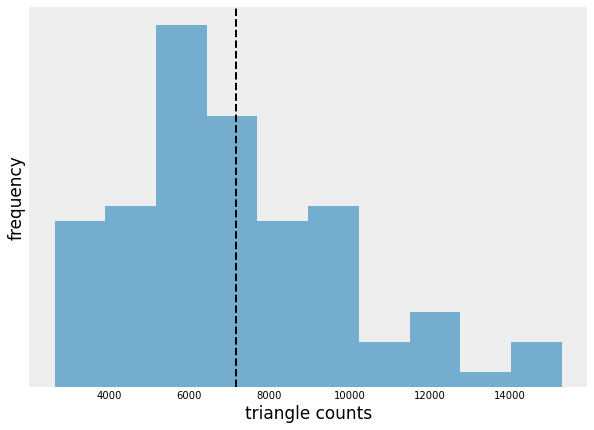

In [309]:
p = 0.7
sampledvec = []
for i in range(100):
    sampledvec.append(sampled_cliques(G,p,k))
plot_triads(sampledvec,clique_count_G)

### Questions
How close is the sampled subgraph count to the actual one?

How small can $p$ be to still obtain accurate estimates?

How does this depend on the clique size $k$?

# Part 4

Instead of sampling or exact computation of the subgraph counts in your null model, it is sometimes also possible to obtain analytical estimates for them. This can get quite involved depending on the exact null models you use, but for the Erdos Renyi model this is still doable. You may use that
$$\text{Var}(N(\triangle)) = \sum_{i,j,k,s,t,u}P(i,j,k \text{ and }{s,t,u}\text{ triangles})-p^6 $$
Now compare the mean and variance of the triangle counts you found experimentally with the mean and variance you computed analytically. Are they similar?

In [18]:
theoretical_triads_mean =              # Compute the mean number of triangles
theoretical_var =               # Compute the variance of the number of triangles

experimental_mean = np.mean(test_triad_counts)              # Compute the mean number of triangles in the sampled ER graphs
experimental_var = np.var(test_triad_counts)

table = [[' ', 'Mean', 'Variance'], ['Experimental', experimental_mean,experimental_var ],['Theoretical', theoretical_triads_mean,theoretical_var ]]

print(tabulate(table))

------------  -----------------  -----------------
              mean               variance
Experimental  8.88               7.6256
Theoretical   8.796261989223112  8.899356102256517
------------  -----------------  -----------------


Compare the theoretical mean number of larger $k$ cliques as well to its sampled value

In [29]:
theoretical_cliques_mean =             # Compute the mean number of triangles
experimental_mean = np.mean(test_kclique_counts) 

print('Theoretical mean ',theoretical_cliques_mean, 'Experimental mean ', experimental_mean)

Theoretical mean  5.459736806787617e-05 Experimental mean  0.0
